In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, InputLayer
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

## Data

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train.shape

(50000, 32, 32, 3)

## Model

### Architecture

In [29]:
model = Sequential()
model.add(InputLayer(input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=(4, 4), strides=(1, 1), padding="valid", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(4, 4), strides=(1, 1), padding="valid", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_10 (Dense)            (None, 256)              

In [31]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)

### Training

In [32]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), callbacks=[early_stop], batch_size=128)

Epoch 1/15
391/391 [==============================] - 19s 48ms/step - loss: 1.6127 - accuracy: 0.4141 - val_loss: 1.4628 - val_accuracy: 0.4706
Epoch 2/15
391/391 [==============================] - 18s 47ms/step - loss: 1.2784 - accuracy: 0.5471 - val_loss: 1.2106 - val_accuracy: 0.5739
Epoch 3/15
391/391 [==============================] - 18s 47ms/step - loss: 1.1412 - accuracy: 0.5969 - val_loss: 1.1286 - val_accuracy: 0.6051
Epoch 4/15
391/391 [==============================] - 18s 46ms/step - loss: 1.0539 - accuracy: 0.6320 - val_loss: 1.0827 - val_accuracy: 0.6213
Epoch 5/15
391/391 [==============================] - 19s 50ms/step - loss: 0.9743 - accuracy: 0.6594 - val_loss: 1.0546 - val_accuracy: 0.6328
Epoch 6/15
391/391 [==============================] - 20s 50ms/step - loss: 0.9188 - accuracy: 0.6818 - val_loss: 1.0130 - val_accuracy: 0.6471
Epoch 7/15
391/391 [==============================] - 19s 48ms/step - loss: 0.8543 - accuracy: 0.7014 - val_loss: 0.9669 - val_accuracy:

### Evaluation

In [33]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

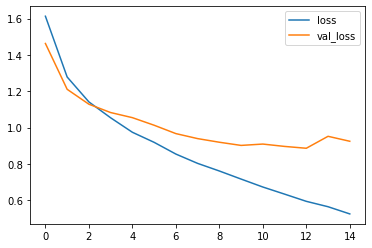

In [34]:
metrics[["loss", "val_loss"]].plot()

<AxesSubplot:>

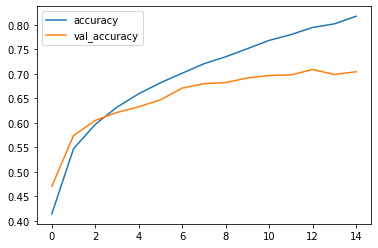

In [35]:
metrics[["accuracy", "val_accuracy"]].plot()

In [36]:
model.evaluate(X_test, y_test, verbose=0)

[0.9247236251831055, 0.7042999863624573]

In [42]:
predictions = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 1s 3ms/step


In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1000
           1       0.79      0.83      0.81      1000
           2       0.64      0.53      0.58      1000
           3       0.55      0.49      0.52      1000
           4       0.66      0.66      0.66      1000
           5       0.55      0.67      0.60      1000
           6       0.81      0.74      0.78      1000
           7       0.76      0.74      0.75      1000
           8       0.83      0.78      0.80      1000
           9       0.73      0.82      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



<AxesSubplot:>

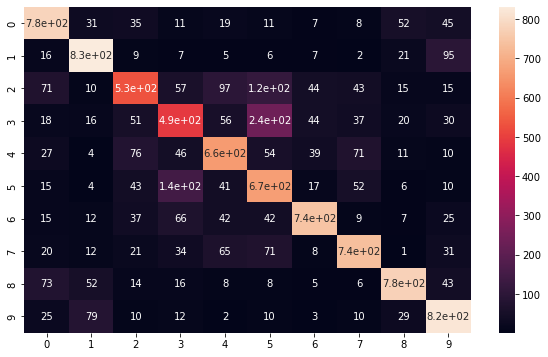

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

### Prediction

In [ ]:
X = X_test[0]
plt.imshow(X)